<div class="alert alert-block alert-info">
Notebook Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

<div class="alert alert-block alert-info">
Acknowledgements:<br>
This dataset was generated from The Movie Database API (https://www.kaggle.com/datasets/tmdb/themoviedb.org). This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here: https://www.themoviedb.org/documentation/api.
</div>

# Table of Contents

[Exploratory Data Analysis Template](#Exploratory-Data-Analysis-Template)

[Notebook Goal](#Notebook-Goal)

[Source Data](#Source-Data)

[Library Loading](#Library-Loading)

[Default Jupyter Notebook Settings](#Default-Jupyter-Notebook-Settings)

[Generic Functions](#Generic-Functions)

[Data Loading](#Data-Loading)

[Exploring DF Overall Statistics](#Exploring-DF-Overall-Statistics)

[Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))

- [High Level EDA](#High-Level-EDA)

[Numerical Features EDA and Visualizations](#Numerical-Features-EDA-and-Visualizations)

- [Numerical Features: Budget, Revenue, Box Office Earnings and Release Years](#Numerical-Features:-Budget,-Revenue,-Box-Office-Earnings-and-Release-Years)
    - [Box Office Earning](#Box-Office-Earning)
    - [Release Calendar Year](#Release-Calendar-Year)
    - [Plotting releasy_cy movie counts](#Plotting-releasy_cy-movie-counts)
    - [Plotting releasy_cy and total movie box_office_earnings](#Plotting-releasy_cy-and-total-movie-box_office_earnings)
    - [Popularity and Box Office Earning](#Popularity-and-Box-Office-Earning)

- [Numerical Features: Runtime](#Numerical-Features:-Runtime)

- [Numerical Features: Vote_count and Popularity](#Numerical-Features:-Vote_count-and-Popularity)

- [Numerical Features: Genres in One-Hot-Encoding Format](#Numerical-Features:-Genres-in-One-Hot-Encoding-Format)

- [Categorical Feature: Original Language](#Categorical-Feature:-Original-Language)

[Stacked bar plot](#Stacked-bar-plot)

[Using the melt function to extract values of a feature](#Using-the-melt-function-to-extract-values-of-a-feature)

[Other Notes ](#Other-Notes)

# Exploratory Data Analysis Template
[Return to Table of Contents](#Table-of-Contents)

This notebook can be used as a template for performing exploratory data analysis of any data. Once the data is loaded as a dataframe (DF), most functions can be used as is with minimal modifications. Only functions that call a feature or column name would need to be modified as appropriate. 

# Notebook Goal
[Return to Table of Contents](#Table-of-Contents)

This notebook leverages the output of the 1_Data_Cleaning_Template.ipynb Notebook and continues into the next step to conduct an Exploratory Data Analysis (EDA) to further analyze the data to extract insights.

The main goal of an EDA is to use a methodical process to extract insights and relationship between the data that can be used for decision-making. The process may vary significantly depending on the type of data or the analysis but in general includes identify and develop visualizations, plots, charts, statistics, correlations, relationship between features, patterns, trends, anomalies, test hypothesis for feature selection, identify potential features that can be used in AI/ML algorithms (e.g., clustering, classification). What will drive which plots you create will be what are you trying to achieve. What story are you trying to make? What is the decision that you want to make? How can you convince your stakeholders? The data will also limit on what you will be able to do and show. The purpose of this notebook is to give you some ideas on plots that we can make and what general functions we can use. There may be other more advanced functions that can be used as well and it is important to review sample plots from visualization libraries like Matplotlib, SNS, Plotly, JSD3 and others. Their example gallery will potentially give you more ideas on things that you can do.

# Source Data
[Return to Table of Contents](#Table-of-Contents)

Detailed description of the data can be found at the 1_Data_Cleaning_Template.ipynb Notebook.

# Library Loading
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

from sklearn.metrics import r2_score

import seaborn as sns
import json

from IPython.display import clear_output, Image # Clears output in functions and Jupyter Notebook Interface and imports Image.

In [2]:
print('Date: {:%b/%d/%Y} \nCurrent Time: {}'.format(datetime.now(), 
                                                    datetime.now().strftime("%H:%M:%S")))

Date: Mar/25/2024 
Current Time: 21:20:36


# Default Jupyter Notebook Settings
[Return to Table of Contents](#Table-of-Contents)

In [3]:
pd.set_option('display.max_colwidth', None) # PD has a limit of 50 characters.  Removes limit and uses the full text.
pd.options.display.float_format = "{:.4f}".format # Sets PD to displays float numbers as 4 decimal places.
plt.style.use('tableau-colorblind10') # Defining a specific color style to use.  Tableu-Colorblind.

# Generic Functions
[Return to Table of Contents](#Table-of-Contents)

In [4]:
# Progress Bar Function. Used in loops.
def progress_status(step, total_steps):
    #Progress Status
    clear_output(wait=True)
    print(f"Currently processing step: {step} of {total_steps}.")

In [5]:
def get_features_df(data): # Extracts the features as a dataframe
    global dfcolumns_index
    # Column selection for selecting columns in loops used in the data cleaning, visualization and model functions.
    dfcolumns = list(data.columns.values)
    dfcolumns_index = pd.DataFrame(dfcolumns, columns=['column'])
    pd.set_option('display.max_rows', None)
    return dfcolumns_index.head(5)

# Data Loading
[Return to Table of Contents](#Table-of-Contents)

In [6]:
# LOADING CSV FILE
# Na_values may need to be reviewed as some datasets may include an accronym.
# For example, 'NA' may be an abbreviation for 'North America'.
# Release_cy will not be parsed as a date.
df_data = pd.read_csv('./output_data/df_data_clean.csv', 
                      encoding = "utf-8-sig",
                      parse_dates=['release_date', 'release_cy_quarter', 'release_cy_month'],
                      keep_default_na=False,
                      na_values=['', '-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A','N/A', '#NA', 'NULL', 'NaN', '-NaN', 'nan', '-nan']) 

# IF LOADING EXCEL FILE: use pd.read_excel.
#df_data = pd.read_excel('.\input_data\FILE_NAME.xlsx', parse_dates=['Date', 'Final Date'])

# Encoding "cp1252" or "utf-8-sig" used so that Excel does not create special characters. Standard Python is utf-8.
# See reference for explanation https://stackoverflow.com/questions/57061645/why-is-%C3%82-printed-in-front-of-%C2%B1-when-code-is-run

C:\Users\felix\AppData\Local\Temp\ipykernel_12924\3023719940.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data = pd.read_csv('./output_data/df_data_clean.csv',


# Exploring DF Overall Statistics
[Return to Table of Contents](#Table-of-Contents)

In [7]:
# Verify that all date columns were selected in the parse dates in the data loading above.
df_data.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'vote_average', 'vote_count', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'release_cy', 'release_cy_quarter', 'release_cy_month',
       'box_office_earning', 'revenue_budget_ratio', 'title_char_count',
       'overview_char_count', 'title_word_count', 'overview_word_count',
       'original_title_overview', 'norm_text_lemma', 'norm_text_stem'],
      dtype='object')

In [8]:
# Verify data loading using the .info() function column name, number of non-nulls, and DType.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225 entries, 0 to 3224
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   budget                   3225 non-null   int64         
 1   genres                   3225 non-null   object        
 2   id                       3225 non-null   int64         
 3   original_language        3225 non-null   object        
 4   original_title           3225 non-null   object        
 5   overview                 3225 non-null   object        
 6   popularity               3225 non-null   float64       
 7   production_companies     3225 non-null   object        
 8   production_countries     3225 non-null   object        
 9   release_date             3225 non-null   datetime64[ns]
 10  revenue                  3225 non-null   int64         
 11  runtime                  3225 non-null   int64         
 12  spoken_languages         3225 non-

In [9]:
# Use the .head() function to prevew a sample record from the dataframe.
df_data.head(1)

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,release_cy_month,box_office_earning,revenue_budget_ratio,title_char_count,overview_char_count,title_word_count,overview_word_count,original_title_overview,norm_text_lemma,norm_text_stem
0,2600000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751, ""name"": ""Family""}]",10895,en,Pinocchio,"Lonely toymaker Geppetto has his wishes answered when the Blue Fairy arrives to bring his wooden puppet Pinocchio to life. Before becoming a real boy, however, Pinocchio must prove he's worthy as he sets off on an adventure with his whistling sidekick and conscience, Jiminy Cricket. From Stromboli's circus to Pleasure Island, Pinocchio is tested by many temptations, but slowly learns how to navigate right from wrong. With a few mishaps along the way, Geppetto's ""little woodenhead"" finally gets it right, proving that when you wish upon a star dreams really can come true!",46.0080,"[{""name"": ""RKO Radio Pictures"", ""id"": 6}, {""name"": ""Walt Disney Productions"", ""id"": 3166}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",1940-02-23,...,1940-02-01,86900000,32.4231,9,576,1,94,"Pinocchio: Lonely toymaker Geppetto has his wishes answered when the Blue Fairy arrives to bring his wooden puppet Pinocchio to life. Before becoming a real boy, however, Pinocchio must prove he's worthy as he sets off on an adventure with his whistling sidekick and conscience, Jiminy Cricket. From Stromboli's circus to Pleasure Island, Pinocchio is tested by many temptations, but slowly learns how to navigate right from wrong. With a few mishaps along the way, Geppetto's ""little woodenhead"" finally gets it right, proving that when you wish upon a star dreams really can come true!",pinocchio lonely toymaker geppetto wish answer blue fairy arrives bring wooden puppet pinocchio life become real boy however pinocchio must prove worthy set adventure whistle sidekick conscience jiminy cricket stromboli circus pleasure island pinocchio test many temptation slowly learns navigate right wrong mishap along way geppetto little woodenhead finally get right prove wish upon star dream really come true,pinocchio lone toymak geppetto wish answer blue fairi arriv bring wooden puppet pinocchio life becom real boy howev pinocchio must prove worthi set adventur whistl sidekick conscienc jimini cricket stromboli circu pleasur island pinocchio test mani temptat slowli learn navig right wrong mishap along way geppetto littl woodenhead final get right prove wish upon star dream realli come true


In [10]:
print(f'The dataframe (DF) has {df_data.shape[0]} records/rows and {df_data.shape[1]} features/columns.')

The dataframe (DF) has 3225 records/rows and 46 features/columns.


In [11]:
# DF of Columns with Index. 
# If Creating new derived features you may need to rerun this cell to add the new features prior to using it.
# I typically use the DF of columns with index for selecting columns in loops.
# Especially during data cleaning, derivation of features, visualization and model functions.
get_features_df(data = df_data)

,column
0,budget
1,genres
2,id
3,original_language
4,original_title


In [12]:
# We can extract the columns from the index dataframe to a list. 
print(dfcolumns_index['column'].to_list())

['budget', 'genres', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western', 'release_cy', 'release_cy_quarter', 'release_cy_month', 'box_office_earning', 'revenue_budget_ratio', 'title_char_count', 'overview_char_count', 'title_word_count', 'overview_word_count', 'original_title_overview', 'norm_text_lemma', 'norm_text_stem']


In [13]:
# Alternatively sending the .columns function in the main dataframe will also result in the same.
print(df_data.columns.to_list())

['budget', 'genres', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western', 'release_cy', 'release_cy_quarter', 'release_cy_month', 'box_office_earning', 'revenue_budget_ratio', 'title_char_count', 'overview_char_count', 'title_word_count', 'overview_word_count', 'original_title_overview', 'norm_text_lemma', 'norm_text_stem']


# Exploratory Data Analysis (EDA)
[Return to Table of Contents](#Table-of-Contents)

This section performs what is called exploratory data analysis. Similar to the data cleaning, each subsection will explore based  on each features data type.

### High Level EDA
[Return to Table of Contents](#Table-of-Contents)

This section leverages several functions that automatically visualizations of the dataframe features such as .hist(), sns.pairplot(), and other functiosn which calculate feature correlation. 

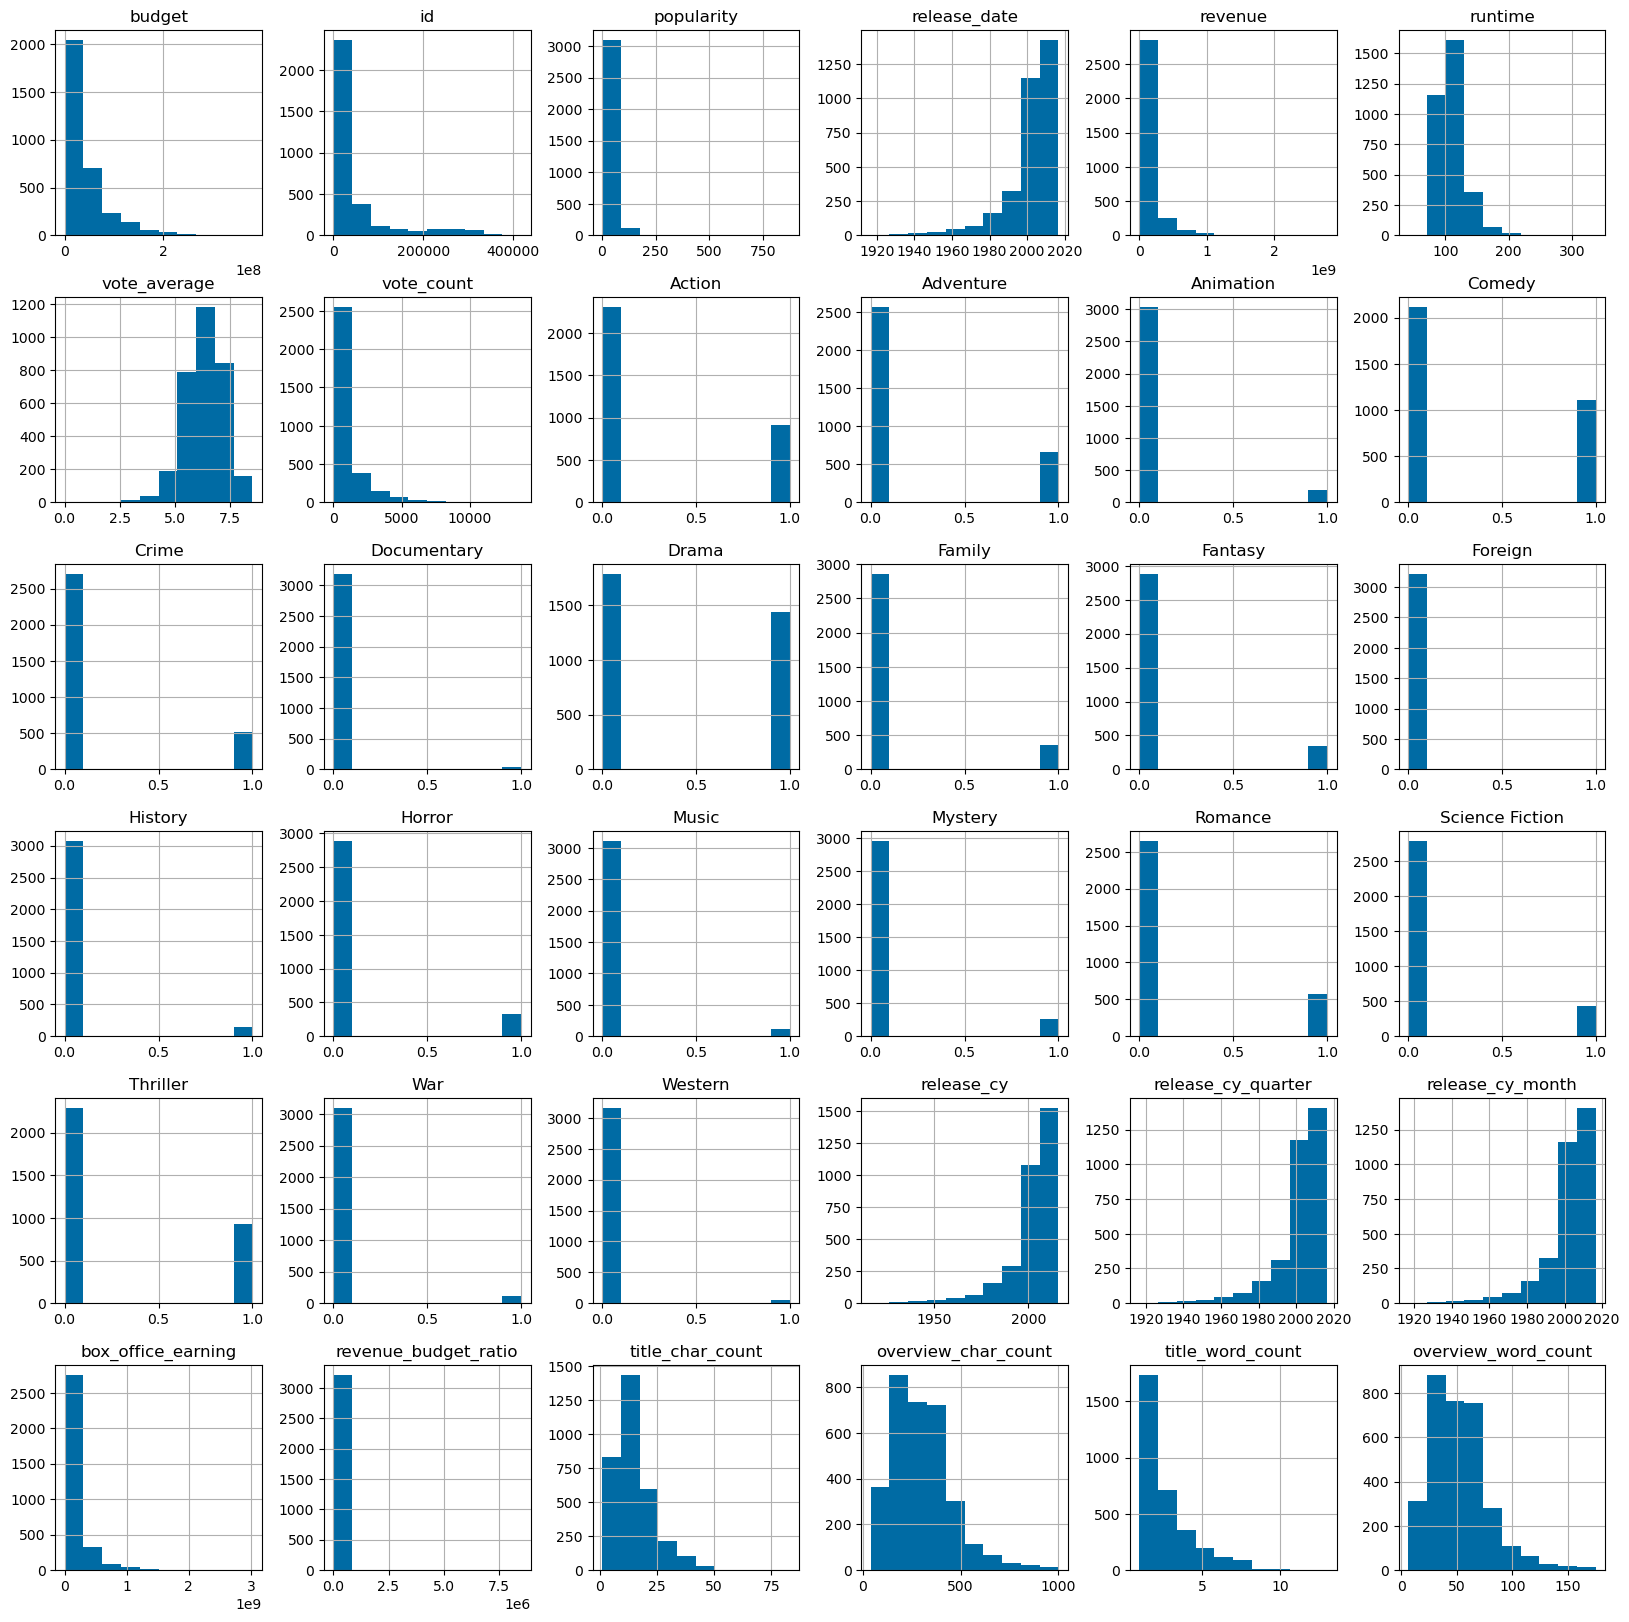

In [14]:
# The .hist() or histogram function shows the distribution for eadh of the numerical features.
# X-axis is the values in the feature and y-axis is how many or the counts.
df_data.hist(figsize = [20, 20]);
# A few observations:
# Many of the Genres are underrepresented (i.g., imbalanced datasets).
# For example, Documentary, Foreign, and Western genres seem to have just a few movie counts.
# It is important to keep in mind the underrepresented features as they may be troublesome for ML algorithms.
# Underrepresented features may not have enough data to use in ML and may need to address data balance.
# Action, Adventure, Comedy, Drama, and Thriller seem to be genres with most counts.
# If using these genres as target labels for classification the data may not be enough to develop a reliable model.
# It may not be enough to even test the model accuracy.
# All the other features seem to have good distributiosn that don't indicate anything negative.
# Many movies towards the later years. 
# Potentially could mean industry growth, however, would need to confirm with the source data. 

In [15]:
# The sns.pairplot() plots the relationship between any-two features. See documentation for other useful parameters.
# Recall that we used the pairplot in the cleaning notebook however the purpose there was to identify outliers.
# The main purpose of the use of pairplot here is to identify features that we may be intersted in visualizing.
# Could be used also for feature selection, identify features to cluster, or provide indication of feature correlation.

# If there are too many numerical features may be difficult to visualize or may take too long. 
# Sns.pairplot() is resource intensive and if there are too many features may take awhile to solve.
# To resolve this there are a few things we can do. 
# Only select a few columns that we may want to explore rather than teh full dataset.
# Use the .sample to plot just a limited number of records.
# Only plot the corner of the plots.

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


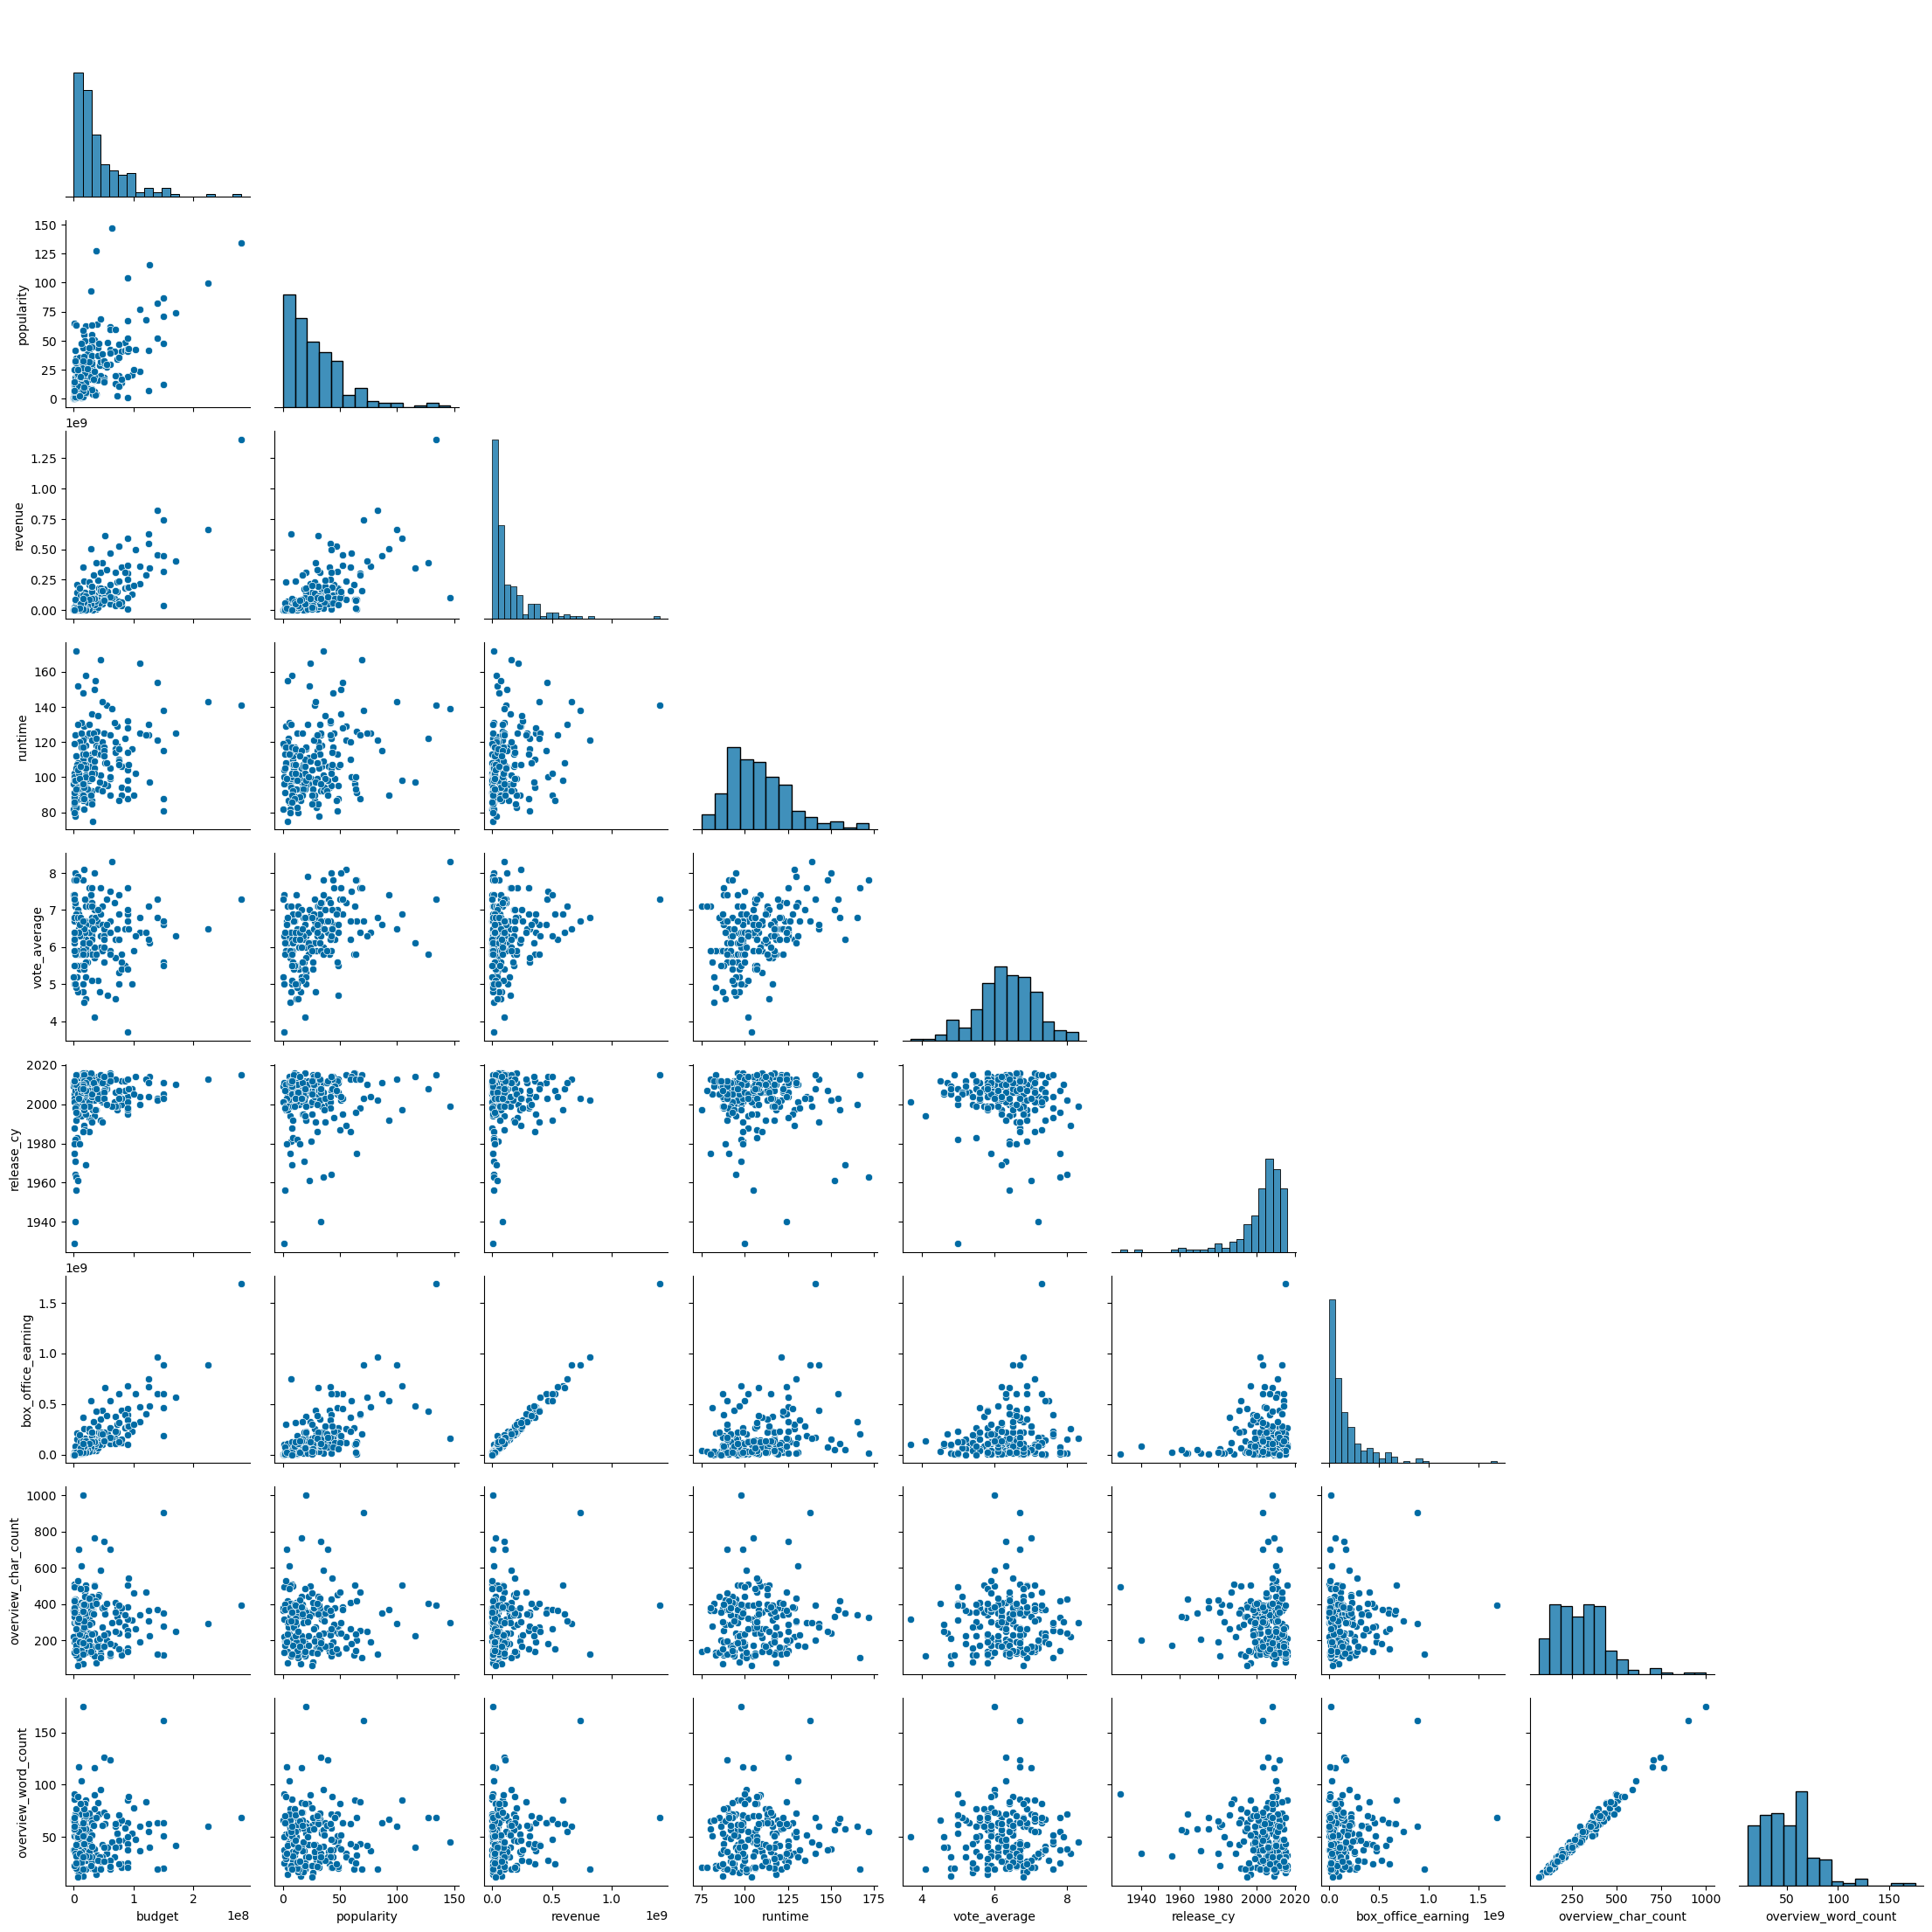

In [17]:
# Selecting columns to plot.
cols_to_plot = ['budget', 'popularity', 'revenue', 'runtime', 
                'vote_average',
                'release_cy', 
                'box_office_earning', 
                'overview_char_count', 'overview_word_count']
# SNS Pairplot Function
sns.pairplot(df_data[cols_to_plot].sample(200), 
             corner = True, 
             kind = 'scatter',
             height = 2.5)
# Notes:
# Overview_char_count seems to be positively correlated to overview_word_count.
# This char/word correlation is expected the more characters the more words.
# With larger amount of words the character count increases linearly and vice-versa.
# Revenue/Budget ratio seems to be including an outlier that is skewing the visualization.
# Revenue seems to go up with higher Vote average
# None of the features sets seem to have discernible clusters (i.e., to use in machine learning clustering)
# Still clustering algorithms could be used.
# Depending on the algorithm may only idnetify outliers (e.g., DBSCAN) or divide the main cluster into smaller (e.g., Kmeans) 

In [18]:
df_data.describe().T # Statistics only for numerical features. Using the .T to transpose the dataframe.
# Few things to note:
# None of the genres should have a mean = 0 or = to 1. 
# If they do that could mean that the genre is not represented.
# Those that have a really low mean are underrepresented whcih confirms the results from histplot.
# Action, Comedy, Drama and Thriller have the highest means.

,count,mean,min,25%,50%,75%,max,std
budget,3225.0000,40561613.0778,1.0000,10500000.0000,25000000.0000,55000000.0000,380000000.0000,44284139.0333
id,3225.0000,44798.8958,5.0000,4951.0000,11442.0000,45272.0000,417859.0000,74651.0471
popularity,3225.0000,29.0439,0.0200,10.4467,20.4033,37.3558,875.5813,36.1847
release_date,3225,2002-03-17 13:33:59.441860352,1916-09-04 00:00:00,1998-09-10 00:00:00,2005-06-28 00:00:00,2010-11-11 00:00:00,2016-09-09 00:00:00,NaN
revenue,3225.0000,121164668.8465,5.0000,17000000.0000,55181129.0000,145896422.0000,2787965087.0000,186362797.5052
runtime,3225.0000,110.7333,41.0000,96.0000,107.0000,121.0000,338.0000,20.9703
vote_average,3225.0000,6.3099,0.0000,5.8000,6.3000,6.9000,8.5000,0.8739
vote_count,3225.0000,977.4304,0.0000,178.0000,470.0000,1148.0000,13752.0000,1414.9085
Action,3225.0000,0.2840,0.0000,0.0000,0.0000,1.0000,1.0000,0.4510
Adventure,3225.0000,0.2043,0.0000,0.0000,0.0000,0.0000,1.0000,0.4033


In [19]:
df_data.describe(include = ['O']).T # Statistics only for object features.
# Nothing stands out in this output.

,count,unique,top,freq
genres,3225,932,"[{""id"": 18, ""name"": ""Drama""}]",204
original_language,3225,27,en,3098
original_title,3225,3225,Pinocchio,1
overview,3225,3225,"Lonely toymaker Geppetto has his wishes answered when the Blue Fairy arrives to bring his wooden puppet Pinocchio to life. Before becoming a real boy, however, Pinocchio must prove he's worthy as he sets off on an adventure with his whistling sidekick and conscience, Jiminy Cricket. From Stromboli's circus to Pleasure Island, Pinocchio is tested by many temptations, but slowly learns how to navigate right from wrong. With a few mishaps along the way, Geppetto's ""little woodenhead"" finally gets it right, proving that when you wish upon a star dreams really can come true!",1
production_companies,3225,2631,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",48
production_countries,3225,318,"[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2147
spoken_languages,3225,438,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2133
original_title_overview,3225,3225,"Pinocchio: Lonely toymaker Geppetto has his wishes answered when the Blue Fairy arrives to bring his wooden puppet Pinocchio to life. Before becoming a real boy, however, Pinocchio must prove he's worthy as he sets off on an adventure with his whistling sidekick and conscience, Jiminy Cricket. From Stromboli's circus to Pleasure Island, Pinocchio is tested by many temptations, but slowly learns how to navigate right from wrong. With a few mishaps along the way, Geppetto's ""little woodenhead"" finally gets it right, proving that when you wish upon a star dreams really can come true!",1
norm_text_lemma,3225,3225,pinocchio lonely toymaker geppetto wish answer blue fairy arrives bring wooden puppet pinocchio life become real boy however pinocchio must prove worthy set adventure whistle sidekick conscience jiminy cricket stromboli circus pleasure island pinocchio test many temptation slowly learns navigate right wrong mishap along way geppetto little woodenhead finally get right prove wish upon star dream really come true,1
norm_text_stem,3225,3225,pinocchio lone toymak geppetto wish answer blue fairi arriv bring wooden puppet pinocchio life becom real boy howev pinocchio must prove worthi set adventur whistl sidekick conscienc jimini cricket stromboli circu pleasur island pinocchio test mani temptat slowli learn navig right wrong mishap along way geppetto littl woodenhead final get right prove wish upon star dream realli come true,1


In [20]:
df_data.corr(numeric_only = True) # Correlation Matrix
# The correlation Matrix with all these datapoints will be difficult to evaluate.
# A positive correlation means that as one feature goes up the other goes up and viceversa.
# A negative correlation means that as one feature goes down the other goes up and viceversa.

,budget,id,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,Thriller,War,Western,release_cy,box_office_earning,revenue_budget_ratio,title_char_count,overview_char_count,title_word_count,overview_word_count
budget,1.0000,0.0143,0.4333,0.7061,0.2311,-0.0311,0.5414,0.3080,0.4129,0.2263,...,0.0047,0.0019,-0.0154,0.2669,0.7999,-0.0180,0.1093,0.0483,0.0790,0.0482
id,0.0143,1.0000,0.1779,0.0304,-0.0337,-0.0673,0.1069,-0.0212,-0.0300,0.0168,...,-0.0269,-0.0245,-0.0217,0.4197,0.0286,-0.0089,-0.0519,-0.0564,-0.0425,-0.0563
popularity,0.4333,0.1779,1.0000,0.6024,0.1822,0.2869,0.7491,0.1429,0.2308,0.1185,...,0.0300,-0.0069,-0.0221,0.1616,0.5978,-0.0014,0.0482,0.0028,0.0321,0.0011
revenue,0.7061,0.0304,0.6024,1.0000,0.2337,0.1881,0.7565,0.1874,0.3440,0.2106,...,-0.0377,-0.0215,-0.0399,0.1473,0.9898,-0.0118,0.1301,0.0516,0.1101,0.0502
runtime,0.2311,-0.0337,0.1822,0.2337,1.0000,0.3783,0.2577,0.0653,0.0719,-0.2277,...,-0.0033,0.2148,0.0795,-0.1575,0.2446,-0.0210,-0.0039,-0.0008,-0.0021,-0.0106
vote_average,-0.0311,-0.0673,0.2869,0.1881,0.3783,1.0000,0.3774,-0.1294,-0.0430,0.0388,...,-0.0745,0.1086,0.0556,-0.1910,0.1532,0.0325,-0.0269,-0.0191,-0.0110,-0.0166
vote_count,0.5414,0.1069,0.7491,0.7565,0.2577,0.3774,1.0000,0.1888,0.2541,0.0955,...,0.0144,-0.0108,-0.0157,0.1735,0.7502,-0.0027,0.0566,0.0339,0.0420,0.0318
Action,0.3080,-0.0212,0.1429,0.1874,0.0653,-0.1294,0.1888,1.0000,0.3629,-0.0921,...,0.2912,0.0469,0.0408,0.0129,0.2208,-0.0124,-0.0129,0.0758,-0.0198,0.0739
Adventure,0.4129,-0.0300,0.2308,0.3440,0.0719,-0.0430,0.2541,0.3629,1.0000,0.1857,...,-0.0113,0.0060,0.0312,-0.0059,0.3747,-0.0099,0.1399,0.0638,0.1231,0.0669
Animation,0.2263,0.0168,0.1185,0.2106,-0.2277,0.0388,0.0955,-0.0921,0.1857,1.0000,...,-0.1500,-0.0419,-0.0133,0.0681,0.2241,-0.0049,0.0113,0.0278,0.0025,0.0399


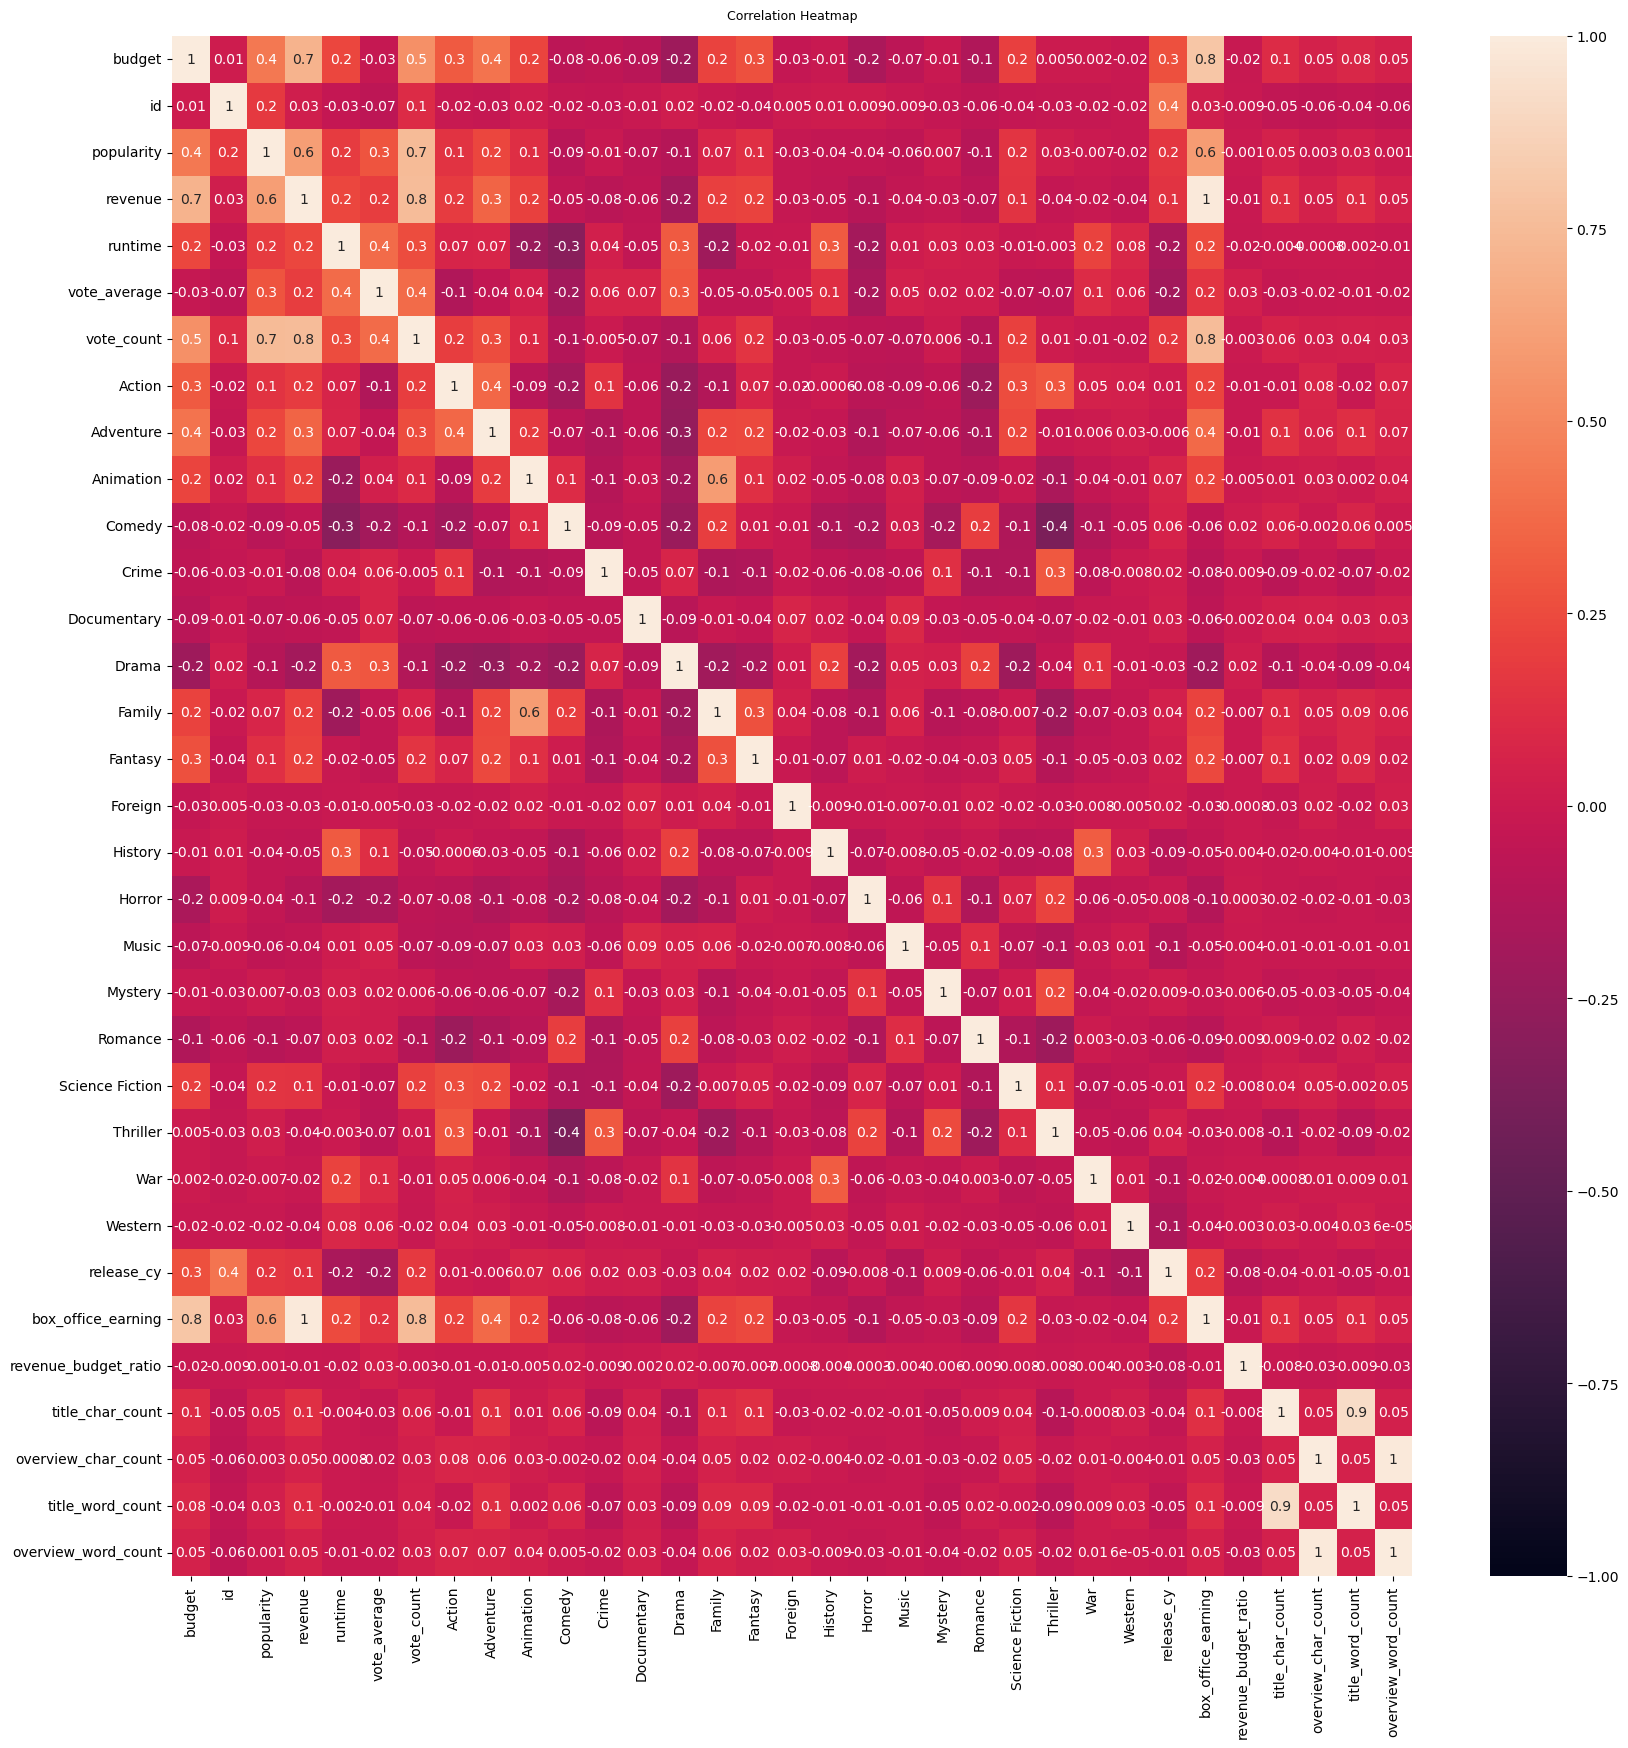

In [21]:
# SNS Correlation heatmap with Title
# This is the same as above but is much easier to identify correlation between features.
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(df_data.corr(numeric_only = True), vmin=-1, vmax=1, fmt='.1g', annot=True)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':9}, pad=12);
# The lighter the color the more the positive correlation.
# The darker the color the higher the negative correlation.
# A few correlation notes:
# Budget and revenuew seem to be postively correlated (0.7).
# Budget and vote counts seem to be positively correlated (0.5)
# Budget and box_office_earnings are postively correlated (0.8) wchich we expect.
# Runtime seem to be only positively correlated to vote_average and maybe drama and history.
# Popularity and revenue seem to be positvely correlated (0.6)
# Popularity and vote_count to be positvely correlated (0.7)
# Family and Animation seem to be positvely correlated (0.6) whcih makes sense.
# Comedy and Thriller seem to be negatively correlated (-0.4)
# Comedy and runtime seem to be somewhat negatively correlated (-0.3)
# Box_office_earnigs is positvely correlated to budget, popularity, revenue and vote_count.

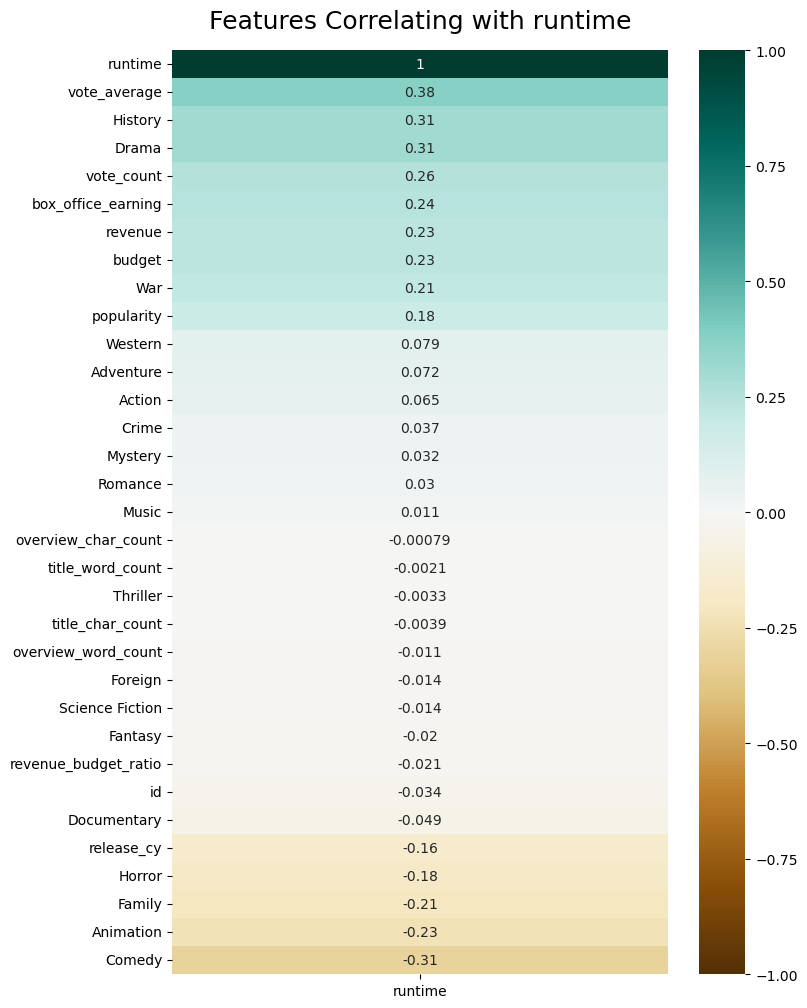

In [22]:
# Only shows the correlations to the selected column in descending order.
correlate_by = 'runtime'
plt.figure(figsize=(8, 12))
correlate_by_heatmap = sns.heatmap(df_data.corr(numeric_only = True)[[correlate_by]].sort_values(by=correlate_by, 
                                                                              ascending=False), 
                                   vmin=-1, 
                                   vmax=1, 
                                   annot=True, 
                                   cmap='BrBG')
correlate_by_heatmap.set_title(f'Features Correlating with {correlate_by}', 
                  fontdict={'fontsize':18}, pad=16);
# The same feature will always be 1 as it has perfect correlation.
# In the case of runtime vote_average has the highest correlation.
# History and drama are the second and third most positive correlation for runtime.
# This means that on average, History and Drama genres seem to have the highest runtimes of the genres.
# This means that on average, Comedy and Animation have the shortest runtimes.
# These results seem to make sense.

# Numerical Features EDA and Visualizations
[Return to Table of Contents](#Table-of-Contents)

This section explores numerical features more in detail. It will use value_counts, different types of plots, group_by and other functions. In the following sections there will be many things that we can probably do. What will drive which plots you create is what are you trying to achieve. What story are you trying to make? What is the decision that you want to make? The purpose of this notebook is to give you some ideas on plots that we can make and what general functions we could use. However, there are probably many other more advanced functions that can be used as well and it is important to review sample plots from visualization libraries like Matplotlib, SNS, Plotly, JSD3 and others. The example gallery will potentially give you more ideas on things that you could do.

## Numerical Features: Budget, Revenue, Box Office Earnings and Release Years
[Return to Table of Contents](#Table-of-Contents)

All these three features are related and dependent per the Box Office Earnings Formula discussed in the previous notebook. Potential correlation were identified:
- Budget and revenue
- Budget and vote_counts
- Budget and Box Office Earnings
- Box_office_earnigs and budget (correlated per the equation)
- Box_office_earnigs and popularity (more popular movie expect to earn more?)
- Box_office_earnigs and revenue (correlated per the equation)
- Box_office_earnigs and vote_count (movies that earn more may have more viewership like word of mouth?

Because both budget and box_office_earning are related will focus the analysis in box_office_earnings. Box_office_earnings can also be trended using the release_cy.

#### Box Office Earning
[Return to Table of Contents](#Table-of-Contents)

In [23]:
# For plotting we need to select better bins.
# We can use the describe function to see the stats of the runtime and see if there are any bins that may make sense.
df_data['box_office_earning'].describe()

count         3225.0000
mean     161726281.9243
std      219880791.3737
min             12.0000
25%       34737911.0000
50%       88100000.0000
75%      196000000.0000
max     3024965087.0000
Name: box_office_earning, dtype: float64

In [24]:
# Initially we had used different bins to identify and explore outliers.
# In this case we can use the statistics above to develop more significant bins.
df_earnings_counts = df_data['box_office_earning'].value_counts(bins = [-np.inf, 0, 1e7, 5e7, 1e8, 5e8, 1e9, np.inf], 
                                           sort = False, 
                                           dropna = False).rename_axis('bin',
                                                                      ).reset_index(name = 'counts')
# Note that the .value_counts function returns a "series" of unique values.
# Several of the plottin functions are easier to work with in dataframe format hence reseting the index may be ideal.
df_earnings_counts
# We can also plot this in a horizontal bar chart.

,bin,counts
0,"(-inf, 0.0]",0
1,"(0.0, 10000000.0]",277
2,"(10000000.0, 50000000.0]",827
3,"(50000000.0, 100000000.0]",652
4,"(100000000.0, 500000000.0]",1247
5,"(500000000.0, 1000000000.0]",184
6,"(1000000000.0, inf]",38


#### Release Calendar Year
[Return to Table of Contents](#Table-of-Contents)

In [25]:
df_data['release_cy'].value_counts().head(10)

release_cy
2011    166
2006    163
2010    162
2009    153
2013    152
2008    145
2005    143
2012    137
2004    137
2014    135
Name: count, dtype: int64

In [26]:
df_data['release_cy'].value_counts().tail(5)
# Selecting 50 in the .tail(50) shows that it is not until around mid-1970's that at least 10 movies per year.
# May make sense that for trending to filter back to the 1980's or later.
# If not it may seem that the box_office_earnings growing exponentially.
# Exponeantial growth may be correct but may need an SME to confirm.

release_cy
1934    1
1925    1
1927    1
1916    1
1947    1
Name: count, dtype: int64

#### Plotting releasy_cy movie counts
[Return to Table of Contents](#Table-of-Contents)

In [27]:
# Let's now visualize the number of movies by release_cy.
# Let's first use only data from 1990 and above.
df_data_filtered = df_data[df_data['release_cy'] >= 1990].copy()
# Note that in the early 1990's about 25 movies are in the data with almost 200 in the later years.

In [28]:
feature_to_plot = 'release_cy' # Feature we want to plot.

df_time_record_counts = df_data_filtered[feature_to_plot].value_counts().sort_index(ascending = True,
                                                                       ).rename_axis(feature_to_plot,
                                                                                    ).reset_index(name='counts')
# Removes the Null ('NaT' and np.nan) if there are any. This ensures no issues with the linear trend equation
df_time_record_counts = df_time_record_counts.loc[(df_time_record_counts[feature_to_plot] != 'NaT') &
                                                              (df_time_record_counts[feature_to_plot] != np.nan)]
df_time_record_counts[feature_to_plot] = df_time_record_counts[feature_to_plot].astype(float)
df_time_record_counts.head(5)

,release_cy,counts
0,1990.0000,23
1,1991.0000,22
2,1992.0000,28
3,1993.0000,35
4,1994.0000,41


In [29]:
# This function does a bar chart with dynamic figure size, options for trending and other parameters.
# Parameters also include labeling of the value of the bars and dynamic formatting of the numbers.
def bar_chart_wtrend(input_data, x_feature, y_feature, add_trend, add_equation):
    fig_width = max(14, (int(len(input_data[x_feature].unique())/4))) # Adjust the width of the figure dynamically depending on number of unique values in the X axis.
    plt.figure(figsize=(fig_width, 4))
    plt.bar(x = input_data[x_feature], height = input_data[y_feature],) # Bars variable to access bar attributes
    ax = plt.gca()    
    plt.xlabel(x_feature, fontsize=12)
    if len(input_data) > 10:
        plt.xticks(ticks = input_data[x_feature].unique(), rotation = 90, size = 14)
    else:
        plt.xticks(ticks = input_data[x_feature].unique(), rotation = 0, size = 14)  
    plt.ylabel("No. of Records", fontsize=16)
    if (add_trend != 'None'):
        ax.ticklabel_format(useOffset=False) # Fixes an issue with the x-axis showing as integers and +202X in the clustering trends. Using the if allows this function to be used with the 'NaT' 
    plt.yticks(size = 14)
    plt.ylim(bottom = 0)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(axis = 'y')   
    
    # Note that your organization may have requirements regarding accesibility for people with disabilities.
    # This loop prints the values on the plot.
    # Note that the number format is dynamically adjusted per the int_number_format.
    for i in range(len(input_data)):
        if len(input_data) > 10: # If there are more than 10 x_values will rotate the text.
            plt.text(input_data[x_feature][i], 
                     input_data[y_feature][i]+input_data[y_feature].max()*.01, 
                     int_number_format(input_data[y_feature][i], 0),
                     size = 14,
                     ha='center',
                     rotation = 90)
        else:
            plt.text(input_data[x_feature][i], 
                     input_data[y_feature][i]+input_data[y_feature].max()*.01, 
                     int_number_format(input_data[y_feature][i], 0), 
                     size = 14,
                     ha='center',
                     rotation = 0)
            
    # Linear Trendline
    if (add_trend == 'Linear'): 
        add_LR_trend(input_data, x_feature, y_feature, add_trend, add_equation)

    plt.show();
    
def add_LR_trend(input_data, x_feature, y_feature, add_trend, add_equation):
    # Linear Trendline equation
    df_freq_fit = np.polynomial.polynomial.polyfit(input_data[x_feature], input_data[y_feature], 1)
    y_intercept_min_year = df_freq_fit[1]*input_data[x_feature].min()+df_freq_fit[0]
    
    # Drawing the linear trendline
    plt.plot(input_data[x_feature], df_freq_fit[1] * input_data[x_feature] + df_freq_fit[0], color='red', linewidth=2)
    if add_equation == True:
        plt.text((input_data[x_feature].max()+1.5), 
                 (input_data[y_feature].min()+input_data[y_feature].max()*0.1), 
                 'Trendline Equation: y={:.2f}*x+{:.2f}'.format(df_freq_fit[1], y_intercept_min_year), 
                 color='darkblue', 
                 size=16)
        
# Function to define the axis label with and e^x. Arguments are the value and tick position
# This dynamically adjust the text in the plots.
def int_number_format(x, pos): 
    if x >= 1e6:
        s = '{:,.3f}M'.format(x*1e-6) # E.g., 1.00M.  If numbers are too big might have to create another level
    elif (1e6 > x) & (x >=1e4):
        s = '{:,.1f}K'.format(x*1e-3) # E.g., 100K - 9,999
    elif (1e4 > x) & (x >=1e3):
        s = '{:,.0f}'.format(x) # E.g., 9,999 - 1000
    elif (1e3 > x) & (x >= 0):
        s = '{:,.0f}'.format(x) # E.g., 999 - 100
    return s

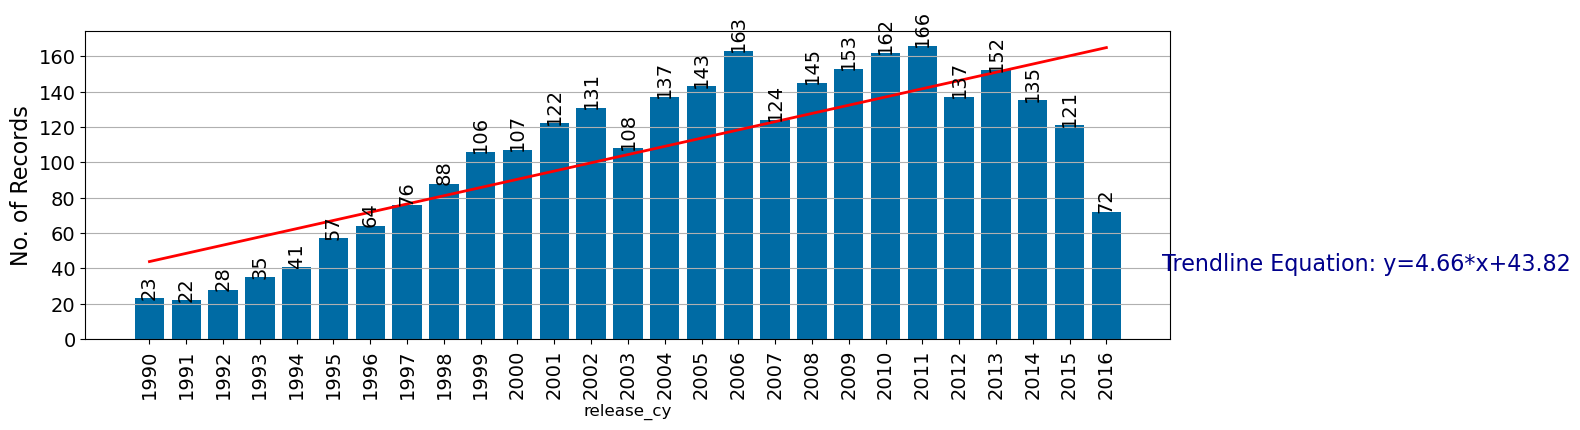

In [30]:
# This functiosn creates a bar plot.
bar_chart_wtrend(input_data = df_time_record_counts,
                 x_feature = 'release_cy', 
                 y_feature = 'counts',
                 add_trend = 'Linear', 
                 add_equation = True)

#### Plotting releasy_cy and total movie box_office_earnings
[Return to Table of Contents](#Table-of-Contents)

In [31]:
# Let's now visualize the number of movies by release_cy and the total movie box_office_earnings. 

feature_to_plot = 'release_cy' # Feature we want to plot.

# We can groupby the data by release_cy and 'box_office_earning'
# We an use various functions .sum(), .mean(), .median(), .min(), and .max() to aggregate the data.
# In this case we will use the mean.
df_time_earning = df_data_filtered.groupby(feature_to_plot,
                                          )['box_office_earning'].mean().reset_index(name='box_office_earning')
# Removes the Null ('NaT' and np.nan) if there are any. This ensures no issues with the linear trend equation
df_time_earning = df_time_earning.loc[(df_time_record_counts[feature_to_plot] != 'NaT') &
                                      (df_time_record_counts[feature_to_plot] != np.nan)]

df_time_earning.head()

,release_cy,box_office_earning
0,1990,199729211.0435
1,1991,151482158.7273
2,1992,158974388.8214
3,1993,133181505.9143
4,1994,175535915.9024


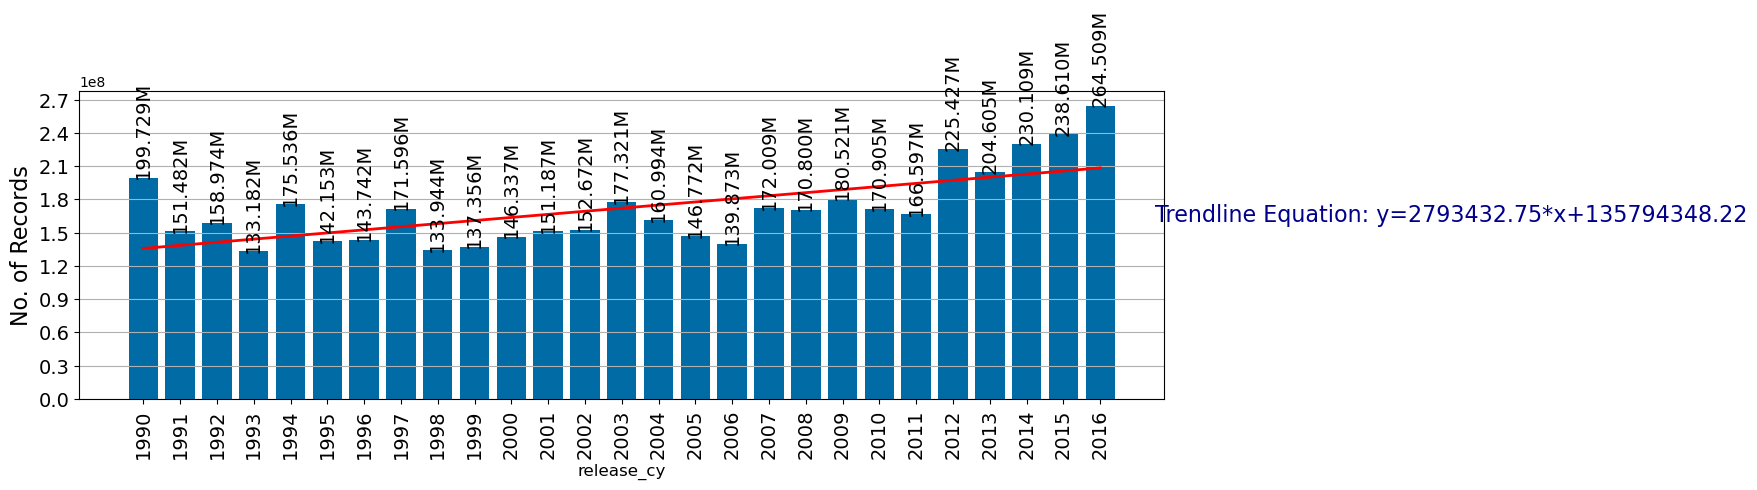

In [32]:
# Since we have the plotting function already defined is just a matter of updating the parameters.
bar_chart_wtrend(input_data = df_time_earning,
                 x_feature = 'release_cy', 
                 y_feature = 'box_office_earning',
                 add_trend = 'Linear', 
                 add_equation = True)
# Note the number has 4 decimals in the dataframe but the figure uses the function int_number_format showing Millions.

In [ ]:
# Now that we have the linear trend equation we can see that the mean of the box_office_earnings on average is growing.
# We are only looking to get an idea if the trend is increasing or decreasing.
# In this case we used a simple linear regression.
# Remember also to evaluate the model using R squared and p-values or other metrics depending on the model.

# Note that there are other more advanced models that can be used for forecasting.
# These include ARIMA, mote_carlo, even neural networks among others.
# For this dataset it is probably too much to do any of the advanced methods.

#### Popularity and Box Office Earning
[Return to Table of Contents](#Table-of-Contents)

The R2 value is 0.5978 and p-value is 0.0.


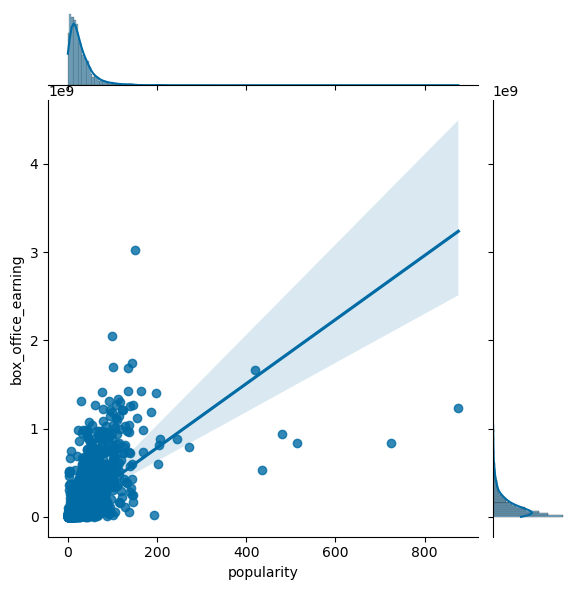

In [33]:
# SNS provides a few functions that can extract the plots like jointplot, regplot, lmplot.
# We could test some hypothesis the greater the popularity the greater the box_office_earning.
sns.jointplot(data = df_data, x="popularity", y="box_office_earning", kind = "reg")
r, p = sp.stats.pearsonr(df_data["popularity"], df_data["box_office_earning"])
print(f'The R2 value is {round(r, 4)} and p-value is {round(p, 4)}.')

In [ ]:
# Linear Regression Model Statistical Measures
# You want a R2 with a higher value as the greater it is the better the model. The value goes from 0 to 1.
# R-square value is how much variation is explained by your model. 
# P-value tells you about the F-statistic hypothesis testing of the "fit of the intercept-only model and your model are equal". 
# If the p-value is less than the significance level (typically 0.05) then your model fits the data well.

# You will have the following scenarios.
#1. High R-square and low p-value
# Model explains a lot of variation within the data and is significant.
#2. low R-square and low p-value (p-value <= 0.05)
# Model doesn't explain much of variation of the data but it is significant.
#3. low R-square and high p-value (p-value > 0.05)
# Model doesn't explain much of variation of the data and it is not significant.
#4. High R-square and high p-value
# Model explains a lot of variation within the data but is not significant.

# In the case above a value of 0.6 R-square means that your model explains 60% of variation within the data
# We have a p-value of 0.
# We have low R-squared and low p-value. You can see that the data varies a lot from the model.
# We have lots of points that are significantly away from the linear regression.

## Numerical Features: Runtime
[Return to Table of Contents](#Table-of-Contents)

When we evaluated the correlations for runtime we had a few observations. These included: 
- History and drama are the second and third most positive correlation for runtime which means that on average, History and Drama genres seem to have the highest runtimes of the genres.
- Comedy and Animation had the lowest or most negative correlations for runtime which meanst that on average, Comedy and Animation have the shortest runtimes.
We should explore those features in this section.

In [34]:
# Previously we had defined 'runtime' bins for value counts.
# That was done for identifying issues, outliers and cleaning the date.
# For plotting we need to select better bins.
# We can use the describe function to see the stats of the runtime and see if there are any bins that may make sense.
df_data['runtime'].describe()

count   3225.0000
mean     110.7333
std       20.9703
min       41.0000
25%       96.0000
50%      107.0000
75%      121.0000
max      338.0000
Name: runtime, dtype: float64

In [35]:
# Mean is 110 with a deviation of 20.
# Could start with one standard deviation down (i.e., 90) and one up (i.e., 130) and increments of 10% (i.e., ~10).
# Could also use two standard deviations down (i.e., 70) and two up (i.e., 150).
# Havign two standard deviations up and down will mean we would be capturing about 95% of values within main bin steps.

df_runtime_counts = df_data['runtime'].value_counts(bins = [0, 70, 80, 90, 100, 110, 120, 
                                                            130, 140, 150, np.inf], 
                                                    sort = False, 
                                                    dropna = False).reset_index(name = 'counts',)
# Alternative to rename the columns of the value_counts function.
# In previous examples of value_counts, used .rename_axis('bin') above, instead of rename column function below.
df_runtime_counts.rename(columns = {'runtime' : 'bin'}, inplace = True)
df_runtime_counts

,bin,counts
0,"(-0.001, 70.0]",7
1,"(70.0, 80.0]",38
2,"(80.0, 90.0]",349
3,"(90.0, 100.0]",773
4,"(100.0, 110.0]",697
5,"(110.0, 120.0]",534
6,"(120.0, 130.0]",379
7,"(130.0, 140.0]",204
8,"(140.0, 150.0]",100
9,"(150.0, inf]",144


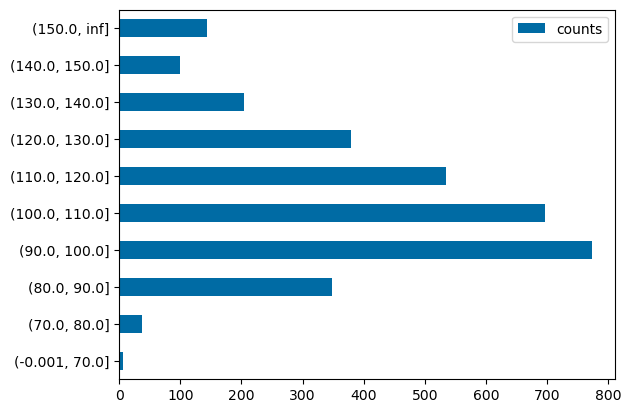

In [36]:
fig = df_runtime_counts.plot(kind='barh');
fig.set_yticklabels(df_runtime_counts['bin']);

# Note that Pandas and Matplotlib both have plotting libraries that call plots in a similar way.
# This include Matplotlib's .plot(kind = 'barh') vs. the similar Pandas .plot.barh()
# They also have different parameters.

In [37]:
# We can compare two extreme of the runtime (e.g., History and Comedy).
# Could also get the average runtime of every movie genre and plot it.
# Could get the top 100 and see the genres.
# Could group_by and calculate the mean.

In [38]:
# The "History" genre had the longest runtimes.
genre = 'History'
print(f'Runtime statistics for "{genre}" genre:')
df_data_filtered = df_data[df_data[genre] == 1].copy()
df_data_filtered['runtime'].describe().rename_axis('statistic',).reset_index()

Runtime statistics for "History" genre:


,statistic,runtime
0,count,145.0000
1,mean,140.7793
2,std,34.4324
3,min,91.0000
4,25%,120.0000
5,50%,132.0000
6,75%,156.0000
7,max,338.0000


In [39]:
# The "Comedy" genre had the lowest runtimes. Let's explore.
genre = 'Comedy'
print(f'Runtime statistics for "{genre}" genre:')
df_data_filtered = df_data[df_data[genre] == 1].copy()
df_data_filtered['runtime'].describe().rename_axis('statistic',).reset_index()

Runtime statistics for "Comedy" genre:


,statistic,runtime
0,count,1108.0000
1,mean,101.8114
2,std,13.3060
3,min,66.0000
4,25%,93.0000
5,50%,100.0000
6,75%,109.0000
7,max,180.0000


In [40]:
# Could create a for loop and create a new dataframe with all the runtimes of genres sorted by mean.
# Features that can have multiple categories are sometimes challenging to analyze.
# Could also create a composite/combined of the genres. 
# However, this in many cases has limited benefit unless there are combinations that are repeated.

## Numerical Features: Vote_count and Popularity
[Return to Table of Contents](#Table-of-Contents)

Popularity and vote_coutn seemed to be postively correlated which may make sense. Movies that are more popular may have a higher audience. We may be able to use this for predicting popularity. Could potentially use this data, and if we had revew in sentiment analysis.

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


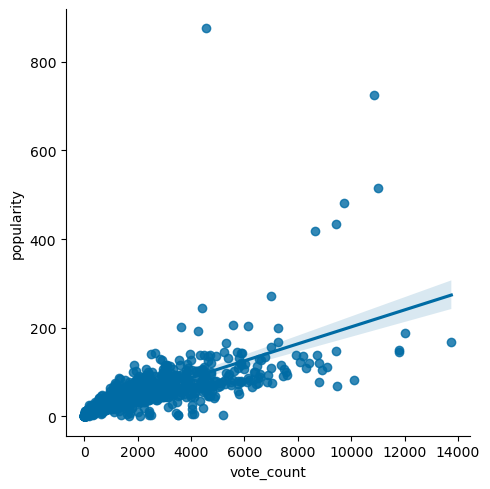

In [41]:
sns.lmplot(data = df_data, x="vote_count", y="popularity");
# Note that the plot is showing a linear regression.
# After ~8000 vote coutns the linear regression does NOT seem to be good predictor.
# To evaluate there are various techniques that will be disucssed in more detail during the Statistics and ML lectures.

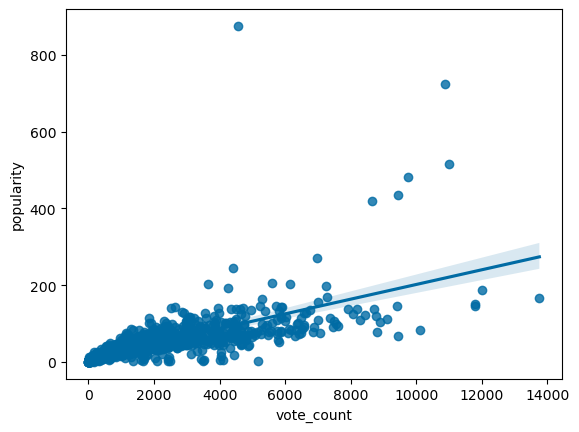

In [42]:
# Similar to the lmplot(). Same comments apply.
sns.regplot(data = df_data, x="vote_count", y="popularity");

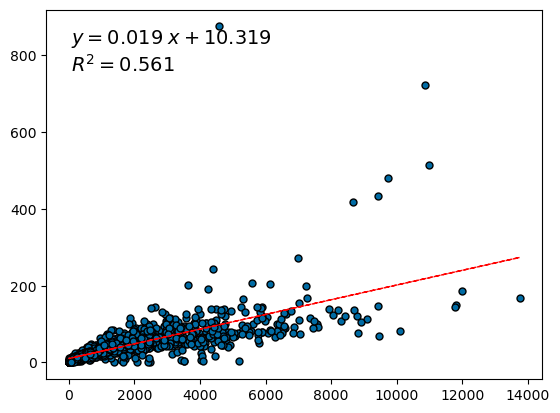

In [43]:
# Plot with R2 and linear trend equation.
x = df_data['vote_count']
y = df_data['popularity']

plt.plot(x,
         y,
         "o", 
         ms = 5, 
         mec= "k" )
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top');

## Numerical Features: Genres in One-Hot-Encoding Format
[Return to Table of Contents](#Table-of-Contents)

Even though the genres are not technically a numerical feature, they were converted to one-hot-encoding which a numerical. The following correlations were identified and may be worth exploring:
- Family and Animation (Postively correlated kind of similar genres)
- Comedy and Thriller (Negatively correlated kind of oposite genres)
- Comedy and runtime (Negatively correlated, maybe tend to be shorter)
- Drama and runtime (Positvely correlated, maybe tend to be longer)

In [44]:
df_data[['Animation', 'Family']].value_counts(dropna = False)
# Recall the outputs of value_counts is a series like. If we wanted to get a dataframe use reset_index()
# For Animation a good majority is also Family.
# A little less than half of the Family is also animation.

Animation  Family
0          0         2838
           1          199
1          1          164
           0           24
Name: count, dtype: int64

In [45]:
df_data[['Thriller', 'Comedy']].value_counts(dropna = False).reset_index()
# Only 65 movies are both Thriller and Comedy.

,Thriller,Comedy,count
0,0,0,1249
1,0,1,1043
2,1,0,868
3,1,1,65


In [46]:
# Let's explore the genres and languages of the movies with top 100 box_office_earning.
# Let's extract the features that we need.

# It is easier to call the text of the genre and use the .index function to find the column index.
# Alternatively when using the .iloc you would need to keep manual track of which index is which.
title_index = df_data.columns.to_list().index("original_title")
boe_index = df_data.columns.to_list().index("box_office_earning")
language_index = df_data.columns.to_list().index("original_language")

first_genre_index = df_data.columns.to_list().index("Action")
last_genre_index = df_data.columns.to_list().index("Western")

# np.r_ can be used to combine slices of dataframes.
# https://numpy.org/doc/stable/reference/generated/numpy.r_.html
df_data_filtered = df_data.iloc[:, np.r_[title_index, boe_index, language_index,
                                         first_genre_index:last_genre_index+1]].copy()

# Sort movies by box_office_earning then select top 100.
df_data_filtered = df_data_filtered.sort_values('box_office_earning', ascending = False).reset_index(drop = True)
# Filter for top 100 Box_Office_Earning and explore what are the top Genres.
df_data_filtered = df_data_filtered.iloc[:100]

#df_data_filtered = df_data[df_data[genre] == 1].copy()
df_data_filtered.head(3)

,original_title,box_office_earning,original_language,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,Avatar,3024965087,en,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Titanic,2045034188,en,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,The Avengers,1739557910,en,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
df_data_filtered['original_language'].value_counts()
# Movies with top 100 box office earning are all in english.

original_language
en    100
Name: count, dtype: int64

In [48]:
# Lets say I am producing a movie but I want a movie in a genre that has the best chances for return of investment.
# Analyzing the movies with top box office earnings may give me some insights.

In [49]:
# NOTE: Before I set the loop, I may try to manually simulate in a several cells as follows.

# OUTSIDE OF THE LOOP:
# Creating a main dataframe outside of the loop which will contain all the information.
df_top_movies_genres = pd.DataFrame(columns = ['genre', 'movie_count'])

# Sets the starting and ending point (i.e., index of the columns)
# Recall that all the genres are in the dataframe one next to each other.
first_genre_index = df_data_filtered.columns.to_list().index("Action")
last_genre_index = df_data_filtered.columns.to_list().index("Western")

# This print is for knowing where my loop starts and ends.
print(f'My loop will start at {first_genre_index} and end at {last_genre_index}.')

My loop will start at 3 and end at 21.


In [50]:
# INSIDE OF THE LOOOP:
col = 3 # This will be my "for" loop line. Starting in three and ending at 21. 
# I will manually change and rerun cell the cell to make sure the loop is doing what I want.
# Reseting the dataframe need to run the previous cell
# If you run to Column 8 which is "Documentary" you will note that it will give a :Keyerror 1"
# This means that the value_count does not have any record were it is 1 (recall this is one-hot-encoded data)
# I will most of the time wont notice an error like this until I try to run the loop.
# To fix that see the next cell which uses the try/except.

# Creates a blank dataframe with required clumns
temp_df = pd.DataFrame(columns = ['genre', 'movie_count']) 
temp_df.at[0, 'genre'] = df_data_filtered.columns.to_list()[col] # Row Value of the genre column.
# Recall that not all genres may be in the top 100 box_office_earnings. See next cell.
# If there is a keyerror where value_coutns does not exist it will assign 0.
temp_df.at[0, 'movie_count'] = df_data_filtered.iloc[:, col].value_counts()[1] # Row value of the movie_count column
# Appending the row of the temp_df at the end of the main_df.
df_top_movies_genres = pd.concat([df_top_movies_genres, temp_df], axis=0, ignore_index = True )

# Sorting results by movie_counts.
df_top_movies_genres = df_top_movies_genres.sort_values('movie_count', 
                                                        ascending = False).reset_index(drop = True)
print(f'Genres of the movies in the Top 100 box office earning')
print(f'Note that movies may have more than one genre.')
df_top_movies_genres.head(5)
# Adventure has by far the most genre in the Top 100 box office earning. 

Genres of the movies in the Top 100 box office earning
Note that movies may have more than one genre.


,genre,movie_count
0,Action,58


In [51]:
# FINAL LOOP

# Creating a main dataframe outside of the loop which will contain all the information.
df_top_movies_genres = pd.DataFrame(columns = ['genre', 'movie_count'])

# Sets the starting and ending point (i.e., index of the columns)
# Recall that all the genres are in the dataframe one next to each other.
first_genre_index = df_data_filtered.columns.to_list().index("Action")
last_genre_index = df_data_filtered.columns.to_list().index("Western")

# Looping thru the starting and ending column indexes.
for col in range(first_genre_index, last_genre_index):
    # Creates a blank dataframe with required clumns
    temp_df = pd.DataFrame(columns = ['genre', 'movie_count']) 
    temp_df.at[0, 'genre'] = df_data_filtered.columns.to_list()[col] # Row Value of the genre column.
    # Recall that not all genres may be in the top 100 box_office_earnings. See next cell.
    # If there is a keyerror where value_coutns does not exist it will assign 0.
    # This is something I will most probably not notice until I run the loop.
    try:
        temp_df.at[0, 'movie_count'] = df_data_filtered.iloc[:, col].value_counts()[1] # Row value of the movie_count column
    except KeyError:
        temp_df.at[0, 'movie_count'] = 0
    # Appending the row of the temp_df at the end of the main_df.
    df_top_movies_genres = pd.concat([df_top_movies_genres, temp_df], axis=0, ignore_index = True )

# Sorting results by movie_counts.
df_top_movies_genres = df_top_movies_genres.sort_values('movie_count', 
                                                        ascending = False).reset_index(drop = True)
print(f'Genres of the movies in the Top 100 box office earning')
print(f'Note that movies may have more than one genre.')
df_top_movies_genres.head(5)
# Adventure has by far the most genre in the Top 100 box office earning. 

Genres of the movies in the Top 100 box office earning
Note that movies may have more than one genre.


,genre,movie_count
0,Adventure,79
1,Action,58
2,Fantasy,41
3,Science Fiction,34
4,Family,33


## Categorical Feature: Original Language
[Return to Table of Contents](#Table-of-Contents)

The original language was not changed in the original data. We an use the feature to explor other functions and visualizations taht we can use with categorical data.

In [52]:
# The value counts give you a high level count of the values.
df_data['original_language'].value_counts(dropna = ' False').head(10)
# Majority of the movies are in english with over 3K values.
# The rest have all less than 30 values.
# For categorical data would be best to use bar plots rather than scatter plots.
# Could also use stacked bar plots.

original_language
en    3098
fr      25
es      15
ja      13
zh      13
de       9
hi       7
it       6
ru       6
ko       5
Name: count, dtype: int64

In [53]:
unique_languages = df_data['original_language'].unique()
print(f'There are {len(unique_languages)} unique original languages in the dataset.')
print(f"The list of languages is: {', '.join(unique_languages)}.")
# Note the print can accepts "quotes" or 'apostrophese'.
# However, if using a function that is using the "quotes" then you have to use the 'apostrophes' in the opening/closing.
# Same if you have an 'apostrophe' in the text you will need to use "quotes" in opening/closing of the print function.
# Not sure what is "xx" or other language accroonyms. May need to check the documentation of the dataset.

There are 27 unique original languages in the dataset.
The list of languages is: en, de, ja, xx, it, fr, zh, ko, te, ru, cn, es, nl, th, da, hi, is, nb, pt, af, pl, he, vi, id, ro, no, fa.


In [54]:
# When having categorical values the groupby function is useful. Sum adds the values within the groups.
df_data.groupby(['original_language']).sum(numeric_only = True).head(5)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,Thriller,War,Western,release_cy,box_office_earning,revenue_budget_ratio,title_char_count,overview_char_count,title_word_count,overview_word_count
original_language,,,,,,,,,,,,,,,,,,,,,
af,3000000,868,2.5042,9879971,94,6.9000,94,0,0,0,...,0,0,0,2005,12879971,3.2933,6,392,1,73
cn,99216953,449452,65.0996,314803639,547,33.0000,1635,5,0,0,...,1,0,0,10020,414020592,15.4548,16,1402,5,258
da,60400000,176858,103.1524,209292216,489,27.6000,2813,0,0,0,...,0,0,0,8036,269692216,12.2740,47,1048,7,182
de,181789750,116484,196.9659,374359889,1098,65.3000,5486,2,1,0,...,3,2,0,17936,556149639,73.5846,114,3542,21,608
en,128771055626,137664765,91360.2377,385601332148,342181,19478.8000,3093210,876,636,172,...,911,105,53,6200879,514372387774,9540536.2825,47252,933933,8572,159591


In [55]:
# When having categorical values the groupby function is useful. Mean calculates the average of values within the groups.
df_data.groupby(['original_language']).mean(numeric_only = True).head(5)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,Thriller,War,Western,release_cy,box_office_earning,revenue_budget_ratio,title_char_count,overview_char_count,title_word_count,overview_word_count
original_language,,,,,,,,,,,,,,,,,,,,,
af,3000000.0000,868.0000,2.5042,9879971.0000,94.0000,6.9000,94.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2005.0000,12879971.0000,3.2933,6.0000,392.0000,1.0000,73.0000
cn,19843390.6000,89890.4000,13.0199,62960727.8000,109.4000,6.6000,327.0000,1.0000,0.0000,0.0000,...,0.2000,0.0000,0.0000,2004.0000,82804118.4000,3.0910,3.2000,280.4000,1.0000,51.6000
da,15100000.0000,44214.5000,25.7881,52323054.0000,122.2500,6.9000,703.2500,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2009.0000,67423054.0000,3.0685,11.7500,262.0000,1.7500,45.5000
de,20198861.1111,12942.6667,21.8851,41595543.2222,122.0000,7.2556,609.5556,0.2222,0.1111,0.0000,...,0.3333,0.2222,0.0000,1992.8889,61794404.3333,8.1761,12.6667,393.5556,2.3333,67.5556
en,41565866.8903,44436.6575,29.4901,124467828.3241,110.4522,6.2875,998.4538,0.2828,0.2053,0.0555,...,0.2941,0.0339,0.0171,2001.5749,166033695.2143,3079.5792,15.2524,301.4632,2.7669,51.5142


In [56]:
# Can calculate the mean of groups for only specified columns.
df_data.groupby(['original_language'])[['runtime', 
                                        'box_office_earning']].mean().sort_values(by=['box_office_earning'],
                                                                                  ascending = False).head(5)
# "te" language has the second highest mean. 
# Note that because of the sparse data for the other languages only the english may be statistically significant.

,runtime,box_office_earning
original_language,,
en,110.4522,166033695.2143
te,159.0000,140000000.0000
zh,122.7692,117051654.4615
ja,123.0769,96896949.8462
cn,109.4000,82804118.4000


In [57]:
# Define the aggregation
aggregations = {"runtime" : ['mean', 'count'], # "runtime" feature/column and the mean/count
                'box_office_earning': ["max", "min"] # Calculate the min/max of the box office earning for the release_cy.
               }
# Perform groupby aggregation by "release_cy" only for English Original Language.
# This may be another approach other than cleaning data out.
# However, I beleive that cleaning the data out that can cause issues avoids the potential of forgettting to filter out.
df_data[df_data['original_language'] == 'en'].groupby('release_cy').agg(aggregations).tail()

runtime       box_office_earning         
               mean count                max      min
release_cy                                           
2012       107.6515   132         1739557910   195000
2013       110.6312   141         1424219009   306825
2014       111.2761   134         1301405097  3345000
2015       111.9573   117         1696249360  2103330
2016       110.5942    69         1403304495  8220371

# Stacked bar plot
[Return to Table of Contents](#Table-of-Contents)

In [58]:
# Let's plot releasy_cy vs. count of movies stacked by language.
df_data_filtered = df_data[df_data['release_cy'] >= 2012].copy()

In [59]:
df_data_filtered.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,release_cy_month,box_office_earning,revenue_budget_ratio,title_char_count,overview_char_count,title_word_count,overview_word_count,original_title_overview,norm_text_lemma,norm_text_stem
409,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",206647,en,Spectre,"A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.",107.3768,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B24"", ""id"": 69434}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2015-10-26,...,2015-10-01,1125674609,3.5946,7,240,1,41,"Spectre: A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.",spectre cryptic message bond past sends trail uncover sinister organization battle political force keep secret service alive bond peel back layer deceit reveal terrible truth behind spectre,spectr cryptic messag bond past send trail uncov sinist organ battl polit forc keep secret servic aliv bond peel back layer deceit reveal terribl truth behind spectr
410,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name"": ""Thriller""}]",49026,en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's crimes to protect the late attorney's reputation and is subsequently hunted by the Gotham City Police Department. Eight years later, Batman encounters the mysterious Selina Kyle and the villainous Bane, a new terrorist leader who overwhelms Gotham's finest. The Dark Knight resurfaces to protect a city that has branded him an enemy.",112.3130,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""DC Entertainment"", ""id"": 9993}, {""name"": ""Syncopy"", ""id"": 9996}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2012-07-16,...,2012-07-01,1334939099,4.3398,21,428,4,65,"The Dark Knight Rises: Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's crimes to protect the late attorney's reputation and is subsequently hunted by the Gotham City Police Department. Eight years later, Batman encounters the mysterious Selina Kyle and the villainous Bane, a new terrorist leader who overwhelms Gotham's finest. The Dark Knight resurfaces to protect a city that has branded him an enemy.",dark knight rise follow death district attorney harvey dent batman assumes responsibility dent crime protect late attorney reputation subsequently hunt gotham city police department eight year later batman encounter mysterious selina kyle villainous bane new terrorist leader overwhelms gotham fine dark knight resurfaces protect city brand enemy,dark knight rise follow death district attorney harvey dent batman assum respons dent crime protect late attorney reput subsequ hunt gotham citi polic depart eight year later batman encount mysteri selina kyle villain bane new terrorist leader overwhelm gotham finest dark knight resurfac protect citi brand enemi
411,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fiction""}]",49529,en,John Carter,"John Carter is a war-weary, former military captain who's inexplicably transported to the mysterious and exotic planet of Barsoom (Mars) and reluctantly becomes

In [60]:
def stacked_bar_plot_data(input_data, feature_to_plot, stack_by, stack_by_list):
    global df_data_stacked
    df_data_stacked = input_data[[feature_to_plot, 
                                  stack_by]].pivot_table(index=[feature_to_plot], 
                                                         columns=[stack_by], 
                                                         aggfunc=len,
                                                         dropna=False,
                                                         fill_value=0)
    df_data_stacked.reset_index(level=0, inplace=True)
    df_data_stacked["Row_Total"] = df_data_stacked[list(stack_by_list)].sum(axis=1)
    stacked_bar_plot(input_data = df_data_stacked, feature_to_plot = feature_to_plot, 
                     stack_by = stack_by, stack_by_list = stack_by_list)
    
def stacked_bar_plot(input_data, feature_to_plot, stack_by, stack_by_list):
    # Adjust the width of the figure dynamically depending on number of unique values in the X axis.
    fig_width = max(14, (int(len(input_data[feature_to_plot].unique())/4))) 
    ax = input_data.plot.bar(x = feature_to_plot, 
                        y = stack_by_list, 
                        stacked=True, 
                        figsize=(fig_width, 4))
    plt.legend(reversed(plt.legend().legend_handles), reversed(stack_by_list),
               loc="upper left", bbox_to_anchor=(1, 1), ncol=1)
    plt.xticks(rotation = 45)
    plt.ylabel('No. of Records', size=16)
    plt.grid(axis = 'y')
    
    # Write values inside stacked bars
    for rect in ax.patches: # .patches is everything inside of the chart (i.e., every rectangle of data)
        # Find where everything is located
        height = int(rect.get_height())
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        # The height of the bar is the data value and can be used as the label
        label_text = f'{height}'  # f'{height:.2f}' to format decimal values
        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2
        if height > 15: # Write value on plot only when height is greater than specified value
            ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
    plt.show();

In [61]:
stack_by = 'original_language'

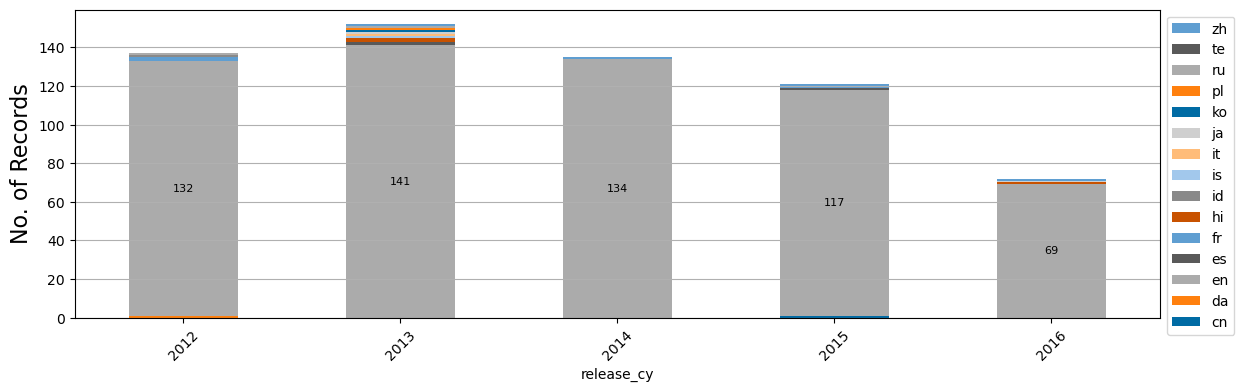

In [62]:
stacked_bar_plot_data(input_data = df_data_filtered, 
                      feature_to_plot = 'release_cy', 
                      stack_by = stack_by,
                      stack_by_list = sorted([x for x in df_data_filtered[stack_by].unique()]))

In [63]:
# If we wanted to explore the DF that the plot uses we can call the variable df_data_stacked.
df_data_stacked.head()

original_language,release_cy,cn,da,en,es,fr,hi,id,is,it,ja,ko,pl,ru,te,zh,Row_Total
0,2012,0,1,132,0,2,0,1,0,0,0,0,0,1,0,0,137
1,2013,0,0,141,2,0,2,0,1,1,1,1,1,1,0,1,152
2,2014,0,0,134,0,1,0,0,0,0,0,0,0,0,0,0,135
3,2015,1,0,117,0,0,0,0,0,0,0,0,0,0,1,2,121
4,2016,0,0,69,0,0,1,0,0,0,1,0,0,0,0,1,72


# Using the melt function to extract values of a feature
[Return to Table of Contents](#Table-of-Contents)

In [ ]:
pd.melt(df_data, id_vars=['release_cy'], 
        value_vars=['genres'],
        var_name='feature', 
        value_name='value').head(5)

# Other Notes 
[Return to Table of Contents](#Table-of-Contents)

- Creating a dashboard that allows for changing the parameters is also valuable in exploring the data.

- Recall that all the dataframes created in the EDA  can be exported either to CSV, MS Excel Spreadsheet. The figures and plots can be exported as png or other formats.

# Notebook End